NOTA: Este notebook solo contiene codigo para explorar alternativas de estimaci√≥n de la demanda.

La idea es identificar el algoritmo que mejor se adapta a cada situaci√≥n y hacer una evaluaci√≥n de su accuracy.

Haremos las evaluaci√≥nes importando directamente los datos desde la BD y guardando un cache local en modo csv

# IMPORTACIONES B√ÅSICAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyodbc
from dotenv import dotenv_values

# CARGAR DATOS DE LA DEMANDA

In [3]:
# OBTENER PAR√ÅMETROS de la CONEXI√ìN
secrets = dotenv_values(".env")
local_secrets = dotenv_values(".env.dev")

DRIVER = secrets["DRIVER2"]
SERVIDOR = secrets["SERVIDOR2"]
PUERTO = secrets["PUERTO2"]
BASE = secrets["BASE2"]
USUARIO = secrets["USUARIO2"]
CONTRASENA = secrets["CONTRASENA2"]

conn_str = f'DRIVER={DRIVER};SERVER={SERVIDOR};PORT={PUERTO};DATABASE={BASE};UID={USUARIO};PWD={CONTRASENA}'

print (conn_str)

DRIVER={ODBC Driver 17 for SQL Server};SERVER=10.54.200.90;PORT=1433;DATABASE=data-sync;UID=eettlin;PWD=lOc4l_eXt$24;


### 1) Cargar Maestro de Sucursales


In [5]:
# CARGAR DESDE BASE DE DATOS
conn = pyodbc.connect(conn_str)
label = 'T100_Sucursales'

# Consulta SQL para obtener las ventas de un proveedor espec√≠fico   
# Reemplazar {proveedor} en la consulta con el ID de la tienda actual
query = f"""
SELECT [C_SUCU_EMPR] as id_tienda
      ,[N_SUCURSAL] as n_sucursal
      ,[N_SUCURSAL_ABREV] as n_sucursal_abrev
      ,[N_SUCURSAL_ABREV2] as n_sucursal_abrev2
      ,[N_SUCURSAL_ABREV3]as n_sucursal_abrev3    
      ,[N_CALLE] as n_calle
      ,[N_LOCALIDAD] as n_localidad
      ,[C_POSTAL_INM] as c_postal
      ,[C_PROVINCIA_SUCU] as c_provincia
      ,[C_ZONA] as c_zona
      ,[C_ZONA_REGIONAL] as c_region
      ,[CLUSTER_LOG] as cluster_log
      ,[C_FORMATO] as c_formato
      ,[FORMATO] as formato
      ,[M_BAJA] as m_baja
      ,[ETIQUETA] AS etiqueta
  FROM [data-sync].[dbo].[T_100_SUCURSALES];
"""

# Ejecutar la consulta SQL
data = pd.read_sql(query, conn)

# Adecuar Tipos de Datos
data['c_provincia']= data['c_provincia'].astype(int)
data['c_zona']= data['c_zona'].astype(int)
data['c_region']= data['c_region'].astype(int)

# Guardar los resultados en un archivo CSV con el nombre de la tienda
file_path = f'data/{label}.csv'
data.to_csv(file_path, index=False, encoding='utf-8')

print(f"Archivo guardado: {file_path}")

# Cerrar la conexi√≥n despu√©s de la iteraci√≥n
conn.close()

C:\Users\eduar\AppData\Local\Temp\ipykernel_26972\3953076524.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


Archivo guardado: data/T100_Sucursales.csv


In [6]:
# CARGAR DESDE CSV
import chardet

with open('data/T100_Sucursales.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])  # Muestra la codificaci√≥n detectada

# Cargar el archivo con codificaci√≥n UTF-8
sucursales = pd.read_csv('data/T100_Sucursales.csv', encoding='utf-8', sep=',')

# Visualizaci√≥n de las primeras filas\
sucursales.head()

utf-8


id_tienda       n_sucursal n_sucursal_abrev n_sucursal_abrev2  \
0          1  Mercado Central               MC        M.Central    
1          2          Posadas               PO        Posadas      
2          3           Trelew               TR        Trelew       
3          4         Casanova               CA        Casanova     
4          5       San Martin               SM        S.Martin     

  n_sucursal_abrev3                                         n_calle  \
0            M.Cent    Av. Circunvalaci√≥n E/los Tallos y los Frutos   
1            Posad.  Ruta Nacional 12 e/Cerrito y Av. R.A.Dominguez   
2            Trelew                               Av.Eva Peron 2400   
3            Casa                Juan Manuel de Rosas 8440/80/88/92   
4            S.Mart                          Av Ricardo Balbin 2886   

       n_localidad c_postal  c_provincia  c_zona  c_region cluster_log  \
0     Villa Celina     1771            1       1         1      AMBA-M   
1          Posadas     3300           13       2         3       NEA-M   
2           Trelew     9100            4       2         2       SUR-M   
3  Isidro Casanova     1765            1       1         7      AMBA-M   
4       San Martin     1650            1       1         7      AMBA-M   

   c_formato    formato m_baja          etiqueta  
0          1  MAYORISTA      N  M-001-M.Central   
1          1  MAYORISTA      N  M-002-Posadas     
2          1  MAYORISTA      N  M-003-Trelew      
3          1  MAYORISTA      N  M-004-Casanova    
4          1  MAYORISTA      N  M-005-S.Martin

### 2) Cargar Maestro de Proveedores

In [7]:
# CARGAR DESDE BASE DE DATOS
conn = pyodbc.connect(conn_str)
label = 'T020_Proveedores'

# Consulta SQL para obtener las ventas de un proveedor espec√≠fico   
# Reemplazar {proveedor} en la consulta con el ID de la tienda actual
query = f"""
SELECT [C_PROVEEDOR]
      ,[N_PROVEEDOR]
      ,[C_TIPO_PROVEEDOR]
      ,[C_TIPO_PROVEEDOR_DIARCO]
      ,[F_ALTA]
      ,[F_BAJA]
      ,[M_ACTIVO]
      ,[C_LINEA_PRODUCTO]
      ,[C_EANEDI]
      ,[C_PLAZO_ENTREGA1]
      ,[C_PLAZO_ENTREGA2]
      ,[C_PLAZO_ENTREGA3]
      ,[C_PLAZO_ENTREGA4]
      ,[C_PLAZO_ENTREGA5]
      ,[C_PLAZO_ENTREGA6]
      ,[M_ATEN_CLIE_LUN]
      ,[M_ATEN_CLIE_MAR]
      ,[M_ATEN_CLIE_MIE]
      ,[M_ATEN_CLIE_JUE]
      ,[M_ATEN_CLIE_VIE]
      ,[M_ATEN_CLIE_SAB]
      ,[M_ATEN_CLIE_DOM]
      ,[I_ENVASE]
      ,[M_BAJA]
      ,[U_DIAS_TOPE_PARA_AGENDA]
      ,[U_DIAS_TOPE_PARA_INGRESO_AGENDA]
      ,[M_ATEN_PROV_LUN]
      ,[M_ATEN_PROV_MAR]
      ,[M_ATEN_PROV_MIE]
      ,[M_ATEN_PROV_JUE]
      ,[M_ATEN_PROV_VIE]
      ,[M_ATEN_PROV_SAB]
      ,[M_ATEN_PROV_DOM]
      ,[C_PERIODO_ATENCION_AGENDA]
      ,[U_DIAS_PAGO]
      ,[C_CLIENTE]
      ,[M_COMPENSACION_DIRECTA]
      ,[C_NIVEL_PROVEEDOR]
      ,[C_TIPO_PROVEEDOR_EDI]
      ,[C_TIPO_PROVEEDOR_EDI_CPTE]
  FROM [data-sync].[dbo].[T020_PROVEEDOR];
"""

# Ejecutar la consulta SQL
data = pd.read_sql(query, conn)

# Adecuar Tipos de Datos
data['C_PROVEEDOR']= data['C_PROVEEDOR'].astype(int)
data['C_TIPO_PROVEEDOR']= data['C_TIPO_PROVEEDOR'].astype(int)
data['C_TIPO_PROVEEDOR_DIARCO']= data['C_TIPO_PROVEEDOR_DIARCO'].astype(int)
data['C_LINEA_PRODUCTO']= data['C_LINEA_PRODUCTO'].astype(int)
data['C_PLAZO_ENTREGA1']= data['C_PLAZO_ENTREGA1'].astype(int)
data['C_PLAZO_ENTREGA2']= data['C_PLAZO_ENTREGA2'].astype(int)
data['C_PLAZO_ENTREGA3']= data['C_PLAZO_ENTREGA3'].astype(int)

# Guardar los resultados en un archivo CSV con el nombre de la tienda
file_path = f'data/{label}.csv'
data.to_csv(file_path, index=False, encoding='utf-8')

print(f"Archivo guardado: {file_path}")

# Cerrar la conexi√≥n despu√©s de la iteraci√≥n
conn.close()

C:\Users\eduar\AppData\Local\Temp\ipykernel_26972\4090573684.py:52: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


Archivo guardado: data/T020_Proveedores.csv


In [9]:
# CARGAR DESDE CSV
import chardet

with open('data/T020_Proveedores.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])  # Muestra la codificaci√≥n detectada

# Cargar el archivo con codificaci√≥n UTF-8
proveedores = pd.read_csv('data/T020_Proveedores.csv', encoding='utf-8', sep=',')

# Visualizaci√≥n de las primeras filas\
proveedores.head()

utf-8


C_PROVEEDOR                                        N_PROVEEDOR  \
0            1  Prueba                                        ...   
1            2  AGROCOM S.A.C.I.I. y F.                       ...   
2            4  BENVENUTO S.A.C.I.                            ...   
3            6  CINBA S.A.                                    ...   
4            9  Migraci√≥n                                     ...   

   C_TIPO_PROVEEDOR  C_TIPO_PROVEEDOR_DIARCO                   F_ALTA  \
0                 1                        1  2002-02-01 04:40:28.000   
1                 1                        4  2017-06-10 00:00:00.000   
2                 1                        1  2017-06-10 00:00:00.000   
3                 1                        1  2017-06-10 00:00:00.000   
4                 1                        1  2008-05-23 00:00:00.000   

       F_BAJA M_ACTIVO  C_LINEA_PRODUCTO         C_EANEDI  C_PLAZO_ENTREGA1  \
0  1900-01-01        N                 1                                  2   
1  1900-01-01        N                 6                                 21   
2  1900-01-01        N                 1                                  7   
3  1900-01-01        N                 5                                 15   
4  1900-01-01        S                 1                                  2   

   ...  M_ATEN_PROV_VIE  M_ATEN_PROV_SAB  M_ATEN_PROV_DOM  \
0  ...                N                N                N   
1  ...                N                N                N   
2  ...                N                N                N   
3  ...                N                N                N   
4  ...                N                N                N   

   C_PERIODO_ATENCION_AGENDA  U_DIAS_PAGO C_CLIENTE M_COMPENSACION_DIRECTA  \
0                        0.0          0.0       0.0                      N   
1                        0.0          0.0       0.0                      N   
2                        0.0          0.0       0.0                      N   
3                        0.0          0.0       0.0                      N   
4                        0.0          0.0       0.0                      N   

  C_NIVEL_PROVEEDOR C_TIPO_PROVEEDOR_EDI C_TIPO_PROVEEDOR_EDI_CPTE  
0               3.0                  0.0                       0.0  
1               3.0                  0.0                       0.0  
2               3.0                  0.0                       0.0  
3               3.0                  0.0                       0.0  
4               3.0                  0.0                       0.0  

[5 rows x 40 columns]

### CARGAR DATOS DE VENTA DEL PROVEEDOR de TODAS LAS SUCURSALES

#### PROVEEDORES


*   20 - MOLINOS RIO DE LA PLATA
*   25 - CAFES LA VIRGINIA S.A.                            
*   62 - ARCOR
*   98 - FRATELLI BRANCA DESTILERIAS S.A.  
*  140 - UNILEVER DE ARGENTINA S.A.
*  189 - BODEGAS Y VI√ëEDOS LOPEZ S.A.I.C.    
* 1465 - QUICKFOOD S.A.             
*  327 - PALADINI S.A.                                     
                                                                                      

In [10]:
# ELEGIR el PROVEEDOR

proveedor = 98
label = '98_Fratelli_Branca'

In [11]:
# Configuraci√≥n de conexi√≥n
conn_str = f'DRIVER={DRIVER};SERVER={SERVIDOR};PORT={PUERTO};DATBASE={BASE};UID={USUARIO};PWD={CONTRASENA}'

conn = pyodbc.connect(conn_str)

# Consulta SQL para obtener las ventas de un proveedor espec√≠fico   
# Reemplazar {proveedor} en la consulta con el ID de la tienda actual
query = f"""
SELECT V.[F_VENTA] as Fecha
     ,V.[C_ARTICULO] as Codigo_Articulo
     ,V.[C_SUCU_EMPR] as Sucursal
     ,V.[I_PRECIO_VENTA] as Precio
     ,V.[I_PRECIO_COSTO] as Costo
     ,V.[Q_UNIDADES_VENDIDAS] as Unidades
     ,V.[C_FAMILIA] as Familia
     ,A.[C_RUBRO] as Rubro
     ,A.[C_SUBRUBRO_1] as SubRubro
     ,A.[N_ARTICULO] as Nombre_Articulo
     ,A.[C_CLASIFICACION_COMPRA] as Clasificacion
FROM [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T702_EST_VTAS_POR_ARTICULO] V
LEFT JOIN [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T050_ARTICULOS] A 
     ON V.C_ARTICULO = A.C_ARTICULO
WHERE A.[C_PROVEEDOR_PRIMARIO] = {proveedor} AND V.F_VENTA >= '20210101' AND A.M_BAJA ='N'
ORDER BY V.F_VENTA ;
"""

# Ejecutar la consulta SQL
data = pd.read_sql(query, conn)

# Guardar los resultados en un archivo CSV con el nombre de la tienda
file_path = f'data/{label}.csv'
data.to_csv(file_path, index=False, encoding='utf-8')

print(f"Archivo guardado: {file_path}")

# Cerrar la conexi√≥n despu√©s de la iteraci√≥n
conn.close()

C:\Users\eduar\AppData\Local\Temp\ipykernel_26972\1559501214.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


Archivo guardado: data/98_Fratelli_Branca.csv


# DATASET PARA ALGORITMOS SUPERVISADOS

## CARGA DEL FICHERO desde el CSV

In [12]:
data = pd.read_csv(f'data/{label}.csv')
data.head()

Fecha  Codigo_Articulo  Sucursal   Precio    Costo  Unidades  Familia  \
0  2021-01-02          45414.0       4.0  265.309  239.769       1.0      6.0   
1  2021-01-02          45414.0      22.0  346.949  239.769       1.0      6.0   
2  2021-01-02          45414.0      47.0  308.499  239.769       1.0      6.0   
3  2021-01-02          45413.0      20.0  346.949  239.769       1.0      6.0   
4  2021-01-02          45413.0      36.0  346.949  239.769       1.0      6.0   

    Rubro  SubRubro                                    Nombre_Articulo  \
0  2365.0    2382.0  Vodka Sernova Wildberry 700 Ml                ...   
1  2365.0    2382.0  Vodka Sernova Wildberry 700 Ml                ...   
2  2365.0    2382.0  Vodka Sernova Wildberry 700 Ml                ...   
3  2365.0    2382.0  Vodka Sernova Fresh Citrus 700 Ml             ...   
4  2365.0    2382.0  Vodka Sernova Fresh Citrus 700 Ml             ...   

   Clasificacion  
0            2.0  
1            2.0  
2            2.0  
3            3.0  
4            3.0

In [13]:
# Adecuar Tipos de Datos
data['Sucursal']= data['Sucursal'].astype(int)
data['Familia']= data['Familia'].astype(int)
data['Rubro']= data['Rubro'].astype(int)
data['SubRubro']= data['SubRubro'].astype(int)
data['Clasificacion']= data['Clasificacion'].astype(int)
data['Codigo_Articulo']= data['Codigo_Articulo'].astype(int)

data['Fecha'] = pd.to_datetime(data['Fecha'])  # Convertir a formato datetime si a√∫n no lo est√°
data.sort_values(by='Fecha', ascending=True)  # Ordenar por fecha de menor a mayor

# Crear una nueva columna con el mes y el a√±o para an√°lisis temporal
data['A√±o-Mes'] = data['Fecha'].dt.to_period('M')

# Crear una nueva columna con el formato A√±o-Semana (AAAA-WW) a partir de la columna Fecha
data['A√±o-Semana'] = data['Fecha'].dt.strftime('%Y-%W')

# Confirmar que la columna sigue siendo un campo datetime
#print(data.dtypes)

#data = data.sort_values(by='Fecha', ascending=True)  # Ordenar en orden ascendente (del m√°s antiguo al m√°s reciente)
#data = data.reset_index()

In [14]:
# Agregar FORMATO de la Tienda

# Asegurar que la columna 'Sucursal' en data y 'id_tienda' en sucursales sean del mismo tipo
data['Sucursal'] = data['Sucursal'].astype(int)
sucursales['id_tienda'] = sucursales['id_tienda'].astype(int)

# Fusionar los DataFrames para agregar el campo 'formato' al DataFrame 'data'
data = data.merge(sucursales[['id_tienda', 'formato']], left_on='Sucursal', right_on='id_tienda', how='left')

# # Eliminar la columna 'id_tienda' despu√©s del merge si ya no es necesaria
# data.drop(columns=['id_tienda'], inplace=True)

data.head()

Fecha  Codigo_Articulo  Sucursal   Precio    Costo  Unidades  Familia  \
0 2021-01-02            45414         4  265.309  239.769       1.0        6   
1 2021-01-02            45414        22  346.949  239.769       1.0        6   
2 2021-01-02            45414        47  308.499  239.769       1.0        6   
3 2021-01-02            45413        20  346.949  239.769       1.0        6   
4 2021-01-02            45413        36  346.949  239.769       1.0        6   

   Rubro  SubRubro                                    Nombre_Articulo  \
0   2365      2382  Vodka Sernova Wildberry 700 Ml                ...   
1   2365      2382  Vodka Sernova Wildberry 700 Ml                ...   
2   2365      2382  Vodka Sernova Wildberry 700 Ml                ...   
3   2365      2382  Vodka Sernova Fresh Citrus 700 Ml             ...   
4   2365      2382  Vodka Sernova Fresh Citrus 700 Ml             ...   

   Clasificacion  A√±o-Mes A√±o-Semana  id_tienda    formato  
0              2  2021-01    2021-00          4  MAYORISTA  
1              2  2021-01    2021-00         22  MAYORISTA  
2              2  2021-01    2021-00         47  MAYORISTA  
3              3  2021-01    2021-00         20  MAYORISTA  
4              3  2021-01    2021-00         36  MAYORISTA

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188196 entries, 0 to 188195
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Fecha            188196 non-null  datetime64[ns]
 1   Codigo_Articulo  188196 non-null  int64         
 2   Sucursal         188196 non-null  int64         
 3   Precio           188196 non-null  float64       
 4   Costo            188196 non-null  float64       
 5   Unidades         188196 non-null  float64       
 6   Familia          188196 non-null  int64         
 7   Rubro            188196 non-null  int64         
 8   SubRubro         188196 non-null  int64         
 9   Nombre_Articulo  188196 non-null  object        
 10  Clasificacion    188196 non-null  int64         
 11  A√±o-Mes          188196 non-null  period[M]     
 12  A√±o-Semana       188196 non-null  object        
 13  id_tienda        188196 non-null  int64         
 14  formato          1

In [12]:
# Recortar Cantidad de Datos ULTIMO A√ëO COMPLETO
data = data[data['Fecha']>='2022-01-01']

### Explorar los Datos

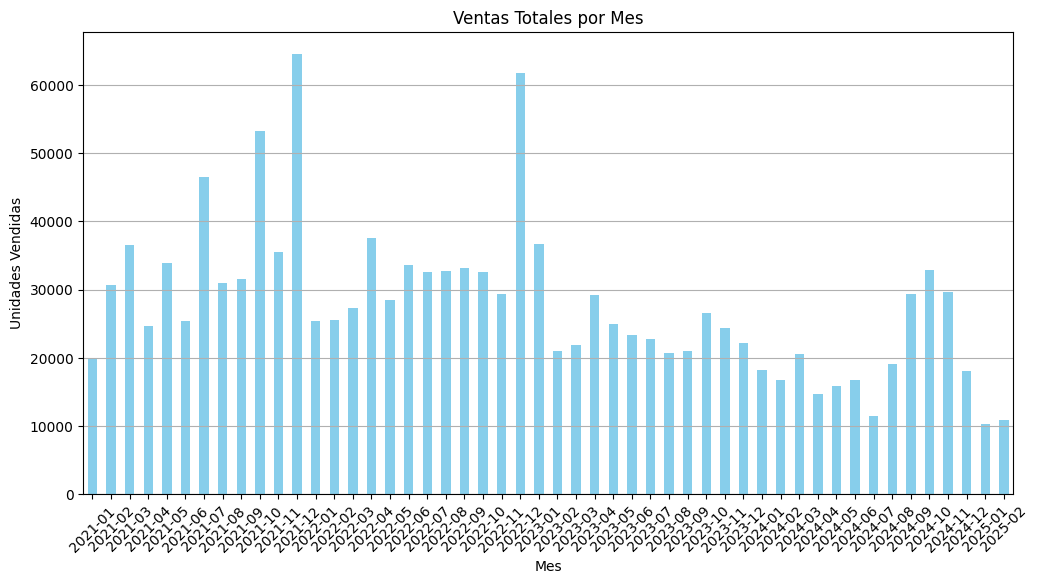

<Figure size 1200x600 with 0 Axes>

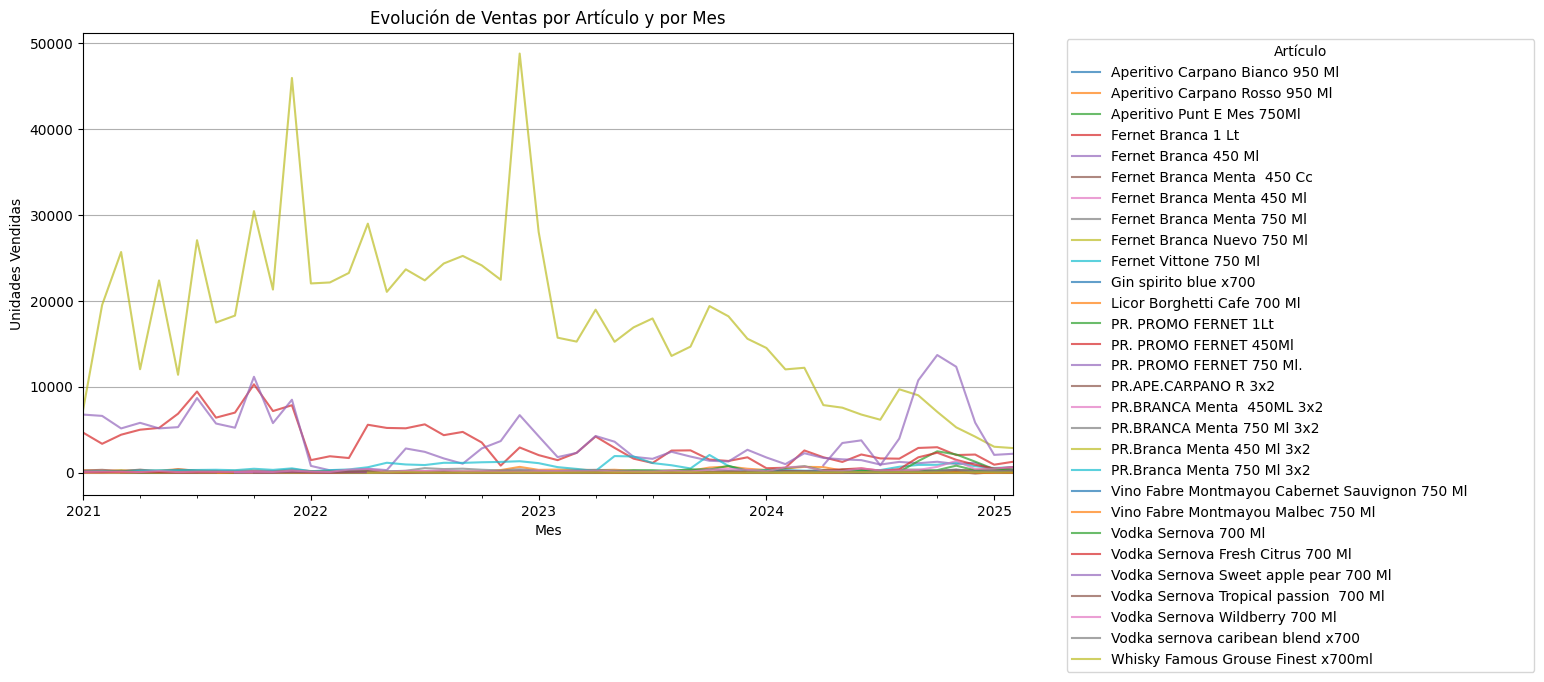

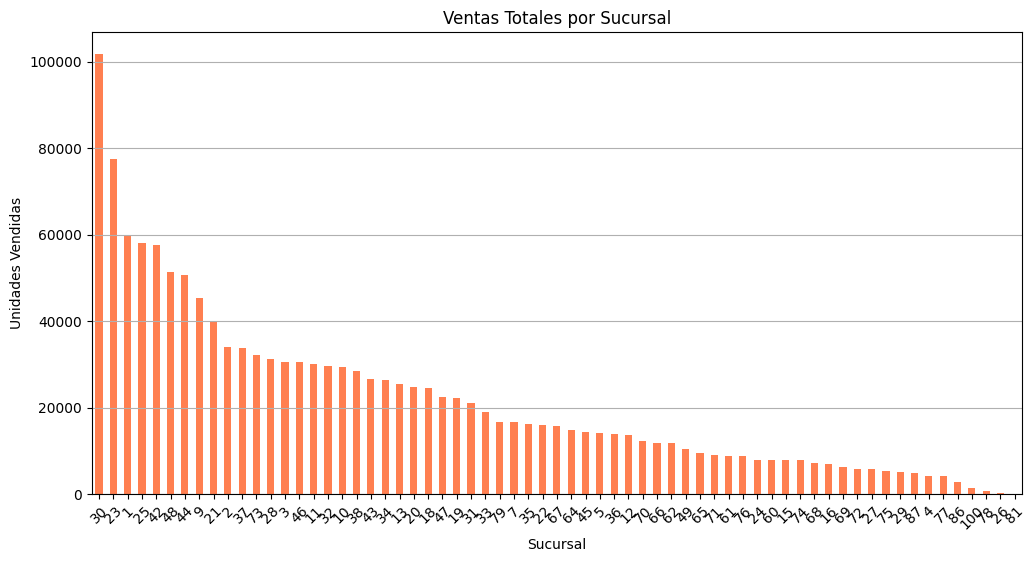

<Figure size 1200x600 with 0 Axes>

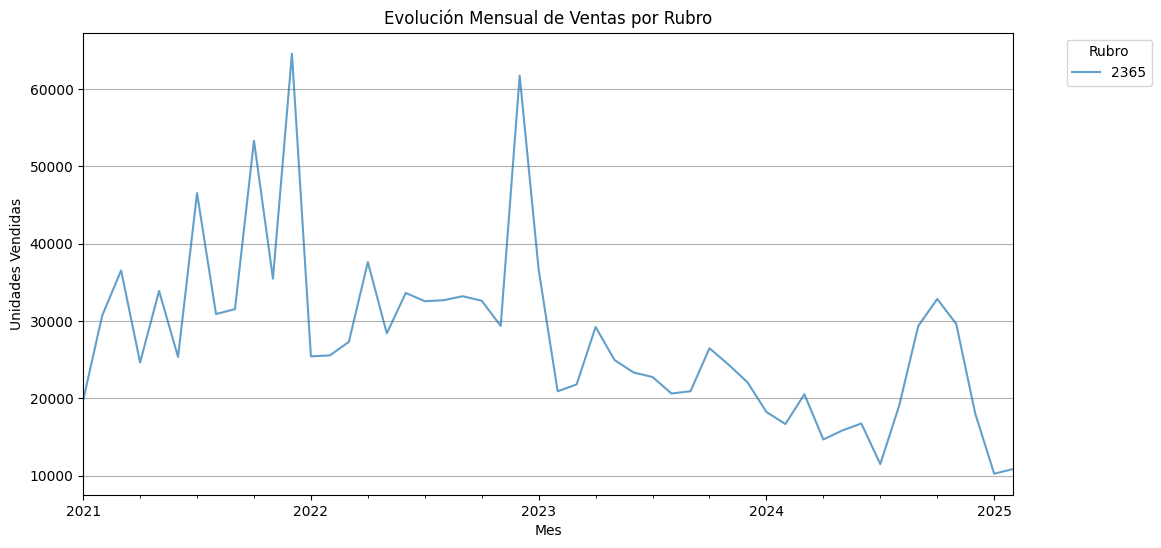

<Figure size 1200x600 with 0 Axes>

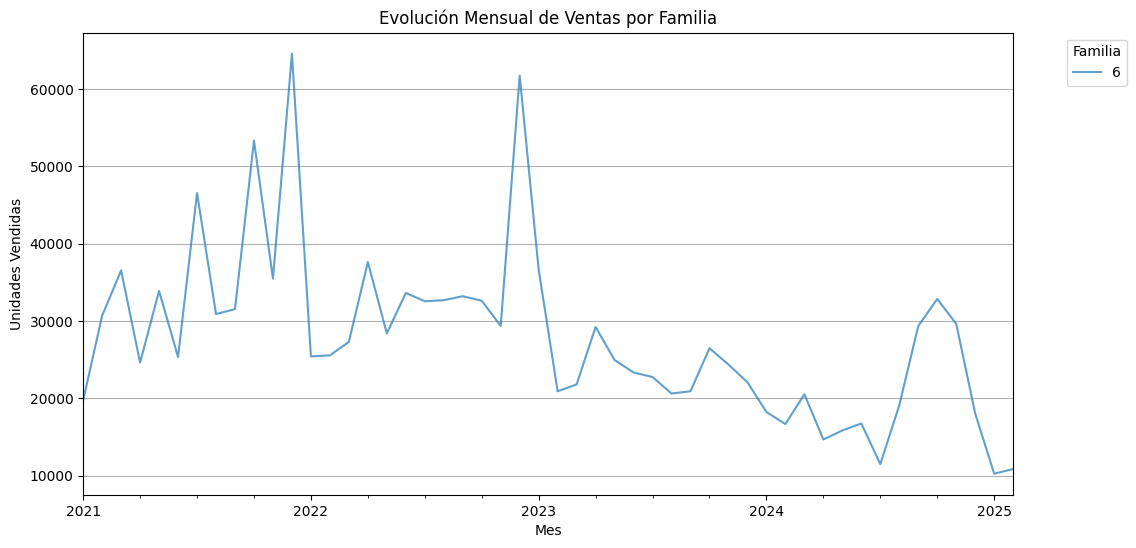

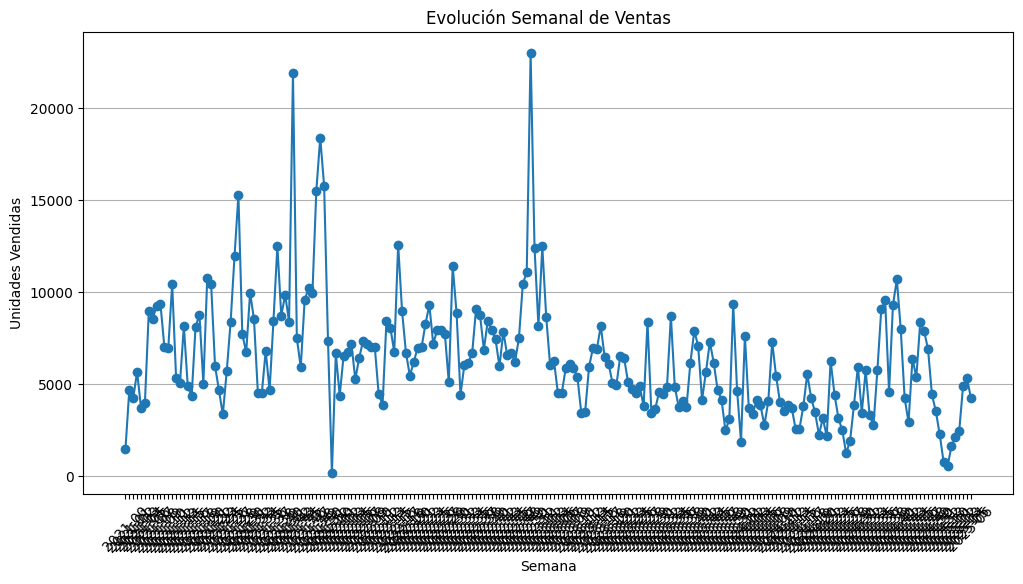

<Figure size 1200x600 with 0 Axes>

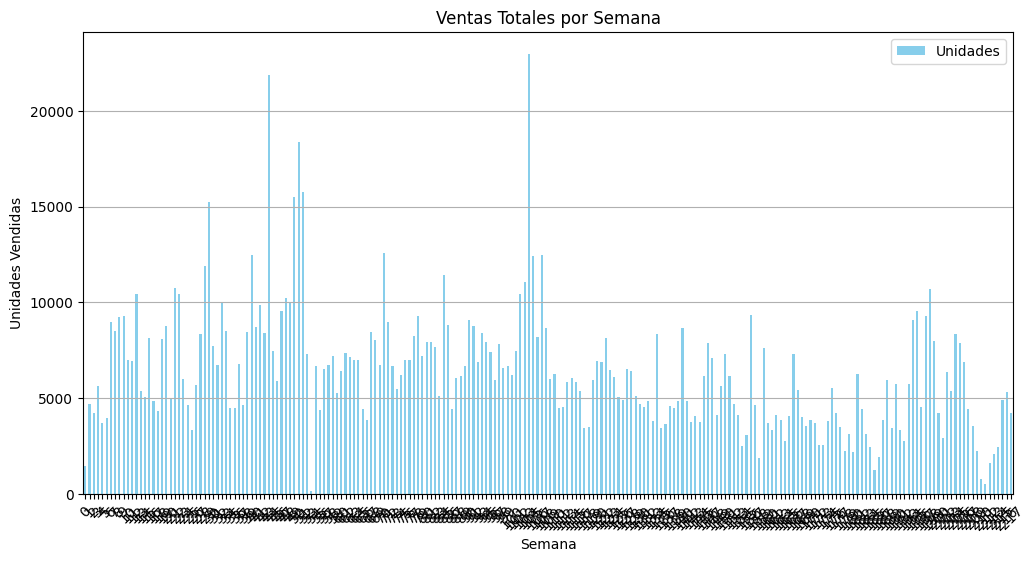

In [16]:
# 1. Ventas Totales por Mes
ventas_mensuales = data.groupby('A√±o-Mes')['Unidades'].sum()

plt.figure(figsize=(12, 6))
ventas_mensuales.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Ventas Totales por Art√≠culo y por Mes (usando Nombre_Articulo)
ventas_articulo_mes = data.groupby(['A√±o-Mes', 'Nombre_Articulo'])['Unidades'].sum().unstack()

plt.figure(figsize=(12, 6))
ventas_articulo_mes.plot(kind='line', figsize=(12, 6), alpha=0.7)
plt.title('Evoluci√≥n de Ventas por Art√≠culo y por Mes')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Art√≠culo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

# 3. Ventas por Sucursal
ventas_sucursal = data.groupby('Sucursal')['Unidades'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ventas_sucursal.plot(kind='bar', color='coral')
plt.title('Ventas Totales por Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4. Ventas por mes y rubro
ventas_rubro_mes = data.groupby(['A√±o-Mes', 'Rubro'])['Unidades'].sum().unstack()

# Graficar la evoluci√≥n mensual de ventas por rubro
plt.figure(figsize=(12, 6))
ventas_rubro_mes.plot(kind='line', figsize=(12, 6), alpha=0.7)
plt.title('Evoluci√≥n Mensual de Ventas por Rubro')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Rubro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

# 5. Ventas por mes y familia
ventas_familia_mes = data.groupby(['A√±o-Mes', 'Familia'])['Unidades'].sum().unstack()

# Graficar la evoluci√≥n mensual de ventas por familia
plt.figure(figsize=(12, 6))
ventas_familia_mes.plot(kind='line', figsize=(12, 6), alpha=0.7)
plt.title('Evoluci√≥n Mensual de Ventas por Familia')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Familia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()


# 6, Ventas por semana
ventas_semanales = data.groupby('A√±o-Semana')['Unidades'].sum().reset_index()
# Formatear la columna 'A√±o-Semana' en el formato 'AAAA-WW'
ventas_semanales['Semana'] = ventas_semanales['A√±o-Semana'].astype(str).str[:4] + '-' + ventas_semanales['A√±o-Semana'].astype(str).str[-2:]

# Graficar la evoluci√≥n semanal de ventas
plt.figure(figsize=(12, 6))
plt.plot(ventas_semanales['A√±o-Semana'].astype(str), ventas_semanales['Unidades'], marker='o', linestyle='-')
plt.title('Evoluci√≥n Semanal de Ventas')
plt.xlabel('Semana')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 7. Graficar la evoluci√≥n semanal de ventas.
#ventas_articulo_semana = data.groupby(['A√±o-Semana', 'Nombre_Articulo'])['Unidades'].sum().unstack()

plt.figure(figsize=(12, 6))
ventas_semanales.plot(kind='bar', figsize=(12, 6),color='skyblue')
plt.title('Ventas Totales por Semana')
plt.xlabel('Semana')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

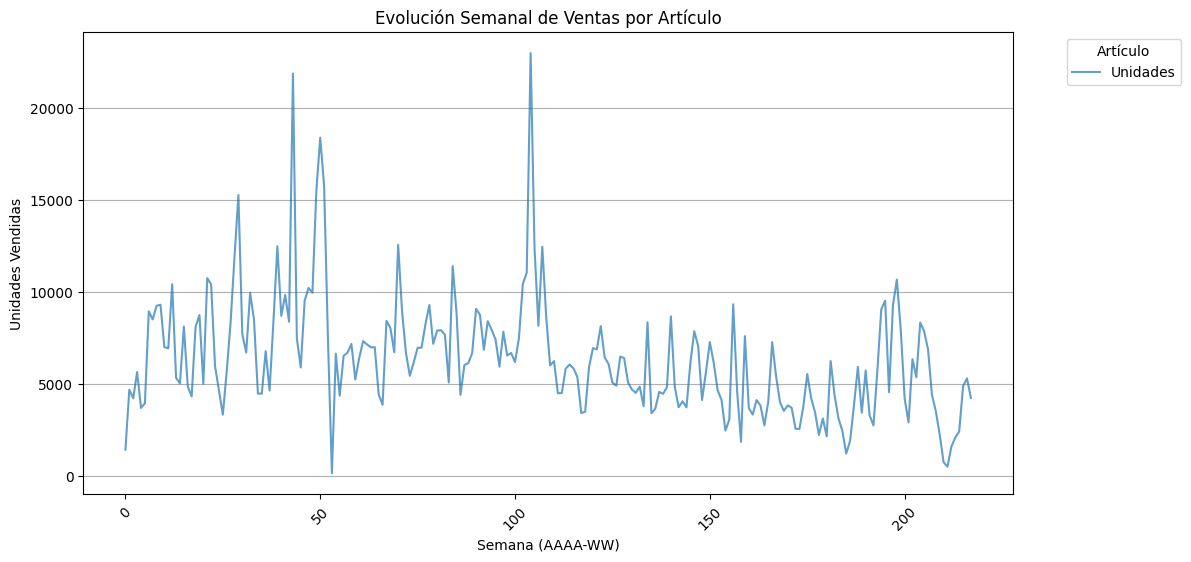

<Figure size 1200x600 with 0 Axes>

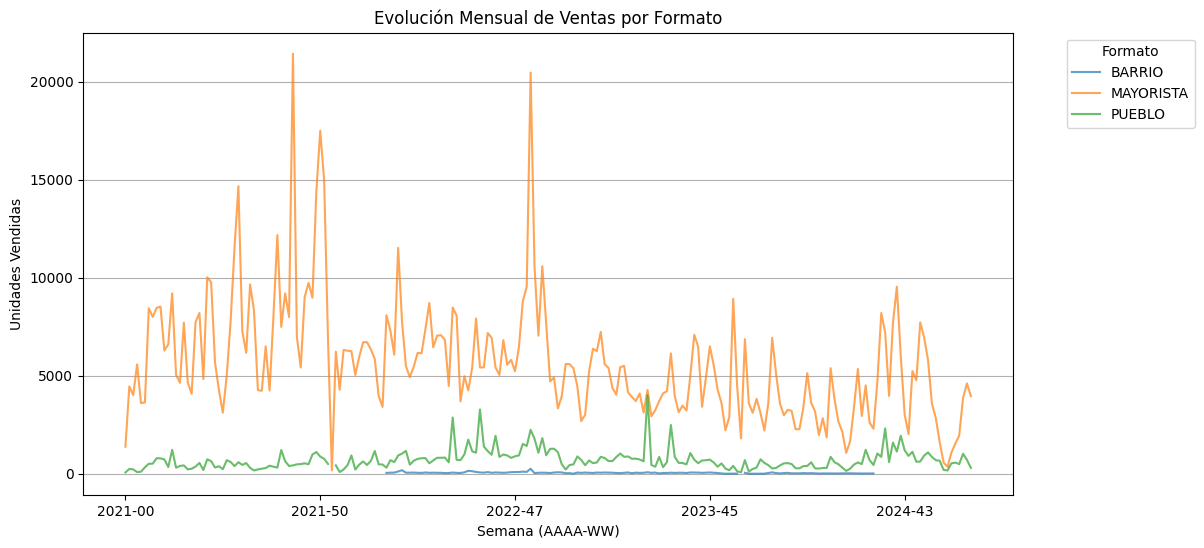

In [17]:
# Asegurar que las semanas est√°n ordenadas correctamente
ventas_semanales = ventas_semanales.sort_index()

# Graficar la evoluci√≥n semanal de ventas por art√≠culo con semanas ordenadas
plt.figure(figsize=(12, 6))
ventas_semanales.plot(kind='line', figsize=(12, 6), alpha=0.7)
plt.title('Evoluci√≥n Semanal de Ventas por Art√≠culo')
plt.xlabel('Semana (AAAA-WW)')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.legend(title='Art√≠culo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

# Agrupar las ventas por mes y formato
ventas_formato_mes = data.groupby(['A√±o-Semana', 'formato'])['Unidades'].sum().unstack()

# Graficar la evoluci√≥n mensual de ventas por formato
plt.figure(figsize=(12, 6))
ventas_formato_mes.plot(kind='line', figsize=(12, 6), alpha=0.7)
plt.title('Evoluci√≥n Mensual de Ventas por Formato')
plt.xlabel('Semana (AAAA-WW)')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Formato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()



# Evaluaci√≥n de Algoritmos para la Estimaci√≥n de la Demanda
   Este Notebook tiene como objetivo evaluar distintos enfoques para la estimaci√≥n de la demanda a partir de datos hist√≥ricos de ventas. Se abordan procesos de an√°lisis exploratorio, preprocesamiento, modelado y evaluaci√≥n de modelos. Los ejemplos presentados incluyen m√©todos estad√≠sticos (ARIMA y Holt-Winters) y un modelo de Machine Learning (Random Forest).

In [18]:
# Importaci√≥n de librer√≠as necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Habilita el Renderizado debajo de la celda
%matplotlib inline   
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

La decisi√≥n de dividir las series por producto o analizarlas en conjunto depende del enfoque que quieras adoptar y de la metodolog√≠a que utilices para la estimaci√≥n de la demanda. A continuaci√≥n, te explico ambas opciones y cu√°l puede ser la mejor estrategia seg√∫n el contexto de tu an√°lisis.

1. Analizar cada producto por separado
(Modelo individual por producto y tienda) En este enfoque, se considera cada combinaci√≥n de producto y tienda como una serie de tiempo independiente. Es decir, si tienes 100 productos y 10 tiendas, estar√≠as analizando 1000 series temporales de demanda.

**Ventajas:**
‚úÖ Mayor precisi√≥n en productos con datos hist√≥ricos suficientes: Cada modelo se especializa en los patrones de cada producto en cada tienda.
‚úÖ Posibilidad de aplicar t√©cnicas avanzadas por producto: Se pueden usar m√©todos como ARIMA/SARIMA, modelos de Machine Learning o redes neuronales LSTM sin que los datos de otros productos interfieran.
‚úÖ Flexibilidad en la selecci√≥n de modelos: Cada producto puede requerir un modelo distinto seg√∫n la estacionalidad, tendencias y nivel de ruido en los datos.

**Desventajas:**
‚ùå Mayor carga computacional: Si tienes muchos productos y tiendas, entrenar modelos por separado puede ser costoso en tiempo y recursos.
‚ùå Problemas con productos de baja venta: Si un producto tiene pocas ventas en una tienda (datos escasos), el modelo puede tener dificultades para predecir la demanda con precisi√≥n.

2. Analizar todas las series en conjunto
(Modelo conjunto para todos los productos y tiendas) En este enfoque, se entrena un modelo √∫nico que toma en cuenta m√∫ltiples productos y tiendas al mismo tiempo. Para esto, se pueden utilizar modelos de Machine Learning que incorporen caracter√≠sticas como:

* Identificador de producto (como variable categ√≥rica o embeddings).
* Identificador de tienda.
* Factores externos (promociones, precios, temporalidad, clima, eventos especiales, etc.).

**Se pueden usar modelos como:**

Redes neuronales recurrentes (LSTM, GRU).
XGBoost o LightGBM (con variables temporales e informaci√≥n de productos y tiendas).
Modelos de series de tiempo multivariables como VAR (Vector AutoRegresivo).

**Ventajas:**
‚úÖ Aprovecha informaci√≥n compartida entre productos: Si hay productos similares con patrones de venta similares, el modelo puede aprender de todos a la vez.
‚úÖ Permite generalizar mejor para productos nuevos: Un modelo conjunto puede hacer mejores predicciones para productos con pocos datos hist√≥ricos.
‚úÖ Reduce la carga computacional: Un solo modelo en lugar de miles de modelos separados.

**Desventajas:**
‚ùå Puede ser menos preciso para productos con patrones de demanda muy distintos.
‚ùå Mayor complejidad en el preprocesamiento: Se necesitan variables adicionales para diferenciar productos y tiendas dentro del modelo.

**¬øCu√°l es la mejor opci√≥n para tu caso?**
* Dado que manejas datos de productos vendidos por un proveedor en 10 tiendas, te recomendar√≠a un enfoque h√≠brido:

* Si los productos tienen patrones de demanda muy distintos, anal√≠zalos de forma individual.

* Ejemplo: Productos con alta estacionalidad vs. productos con demanda constante.
Si los productos tienen patrones similares o son de la misma categor√≠a, puedes entrenar un modelo conjunto.

* Ejemplo: Bebidas, snacks o art√≠culos de cuidado personal suelen tener tendencias similares dentro de una misma tienda.
Si tienes datos limitados para algunos productos, agruparlos en un modelo conjunto puede ayudar a mejorar la precisi√≥n.

### Enfoque recomendado
* Paso 1: Caracterizaci√≥n de los productos
Clasificar productos seg√∫n patrones de demanda:
Altamente estacionales
De demanda estable
Con ventas espor√°dicas
* Paso 2: Selecci√≥n de modelos
Productos con datos suficientes ‚Üí Modelos individuales por producto y tienda.
Productos con datos limitados ‚Üí Modelos conjuntos con variables adicionales como identificador de producto y tienda.
* Paso 3: Pruebas y validaci√≥n
Entrenar ambos enfoques y evaluar el error de predicci√≥n en un conjunto de prueba.
Si un modelo conjunto tiene un error similar al modelo individual pero es m√°s eficiente, √∫salo.

#### Conclusi√≥n
Si puedes permitirte entrenar modelos individuales para cada producto y tienda, es el enfoque m√°s preciso. Sin embargo, si tienes demasiados productos o datos limitados, usar un modelo conjunto puede ser m√°s eficiente y generalizar mejor.

üìå Recomendaci√≥n pr√°ctica:
Empieza probando un modelo conjunto con variables de identificaci√≥n de producto y tienda, y si detectas que algunos productos tienen patrones muy distintos, crea modelos individuales solo para esos casos. üöÄ

## Carga y Exploraci√≥n Inicial de los Datos

Se asume que los datos se encuentran en un archivo CSV denominado `ventas.csv`. En esta secci√≥n se carga el archivo y se realizan inspecciones preliminares

In [19]:
# Carga de datos
df = data

# Mostrar resultado
import ace_tools_open  as tools
tools.display_dataframe_to_user(name="DataFrame B√°sico", dataframe=df)

# Visualizaci√≥n de las primeras filas\
df.head()

# Informaci√≥n general del dataframe
print(df.info())

# Estad√≠sticas descriptivas
print(df.describe())

DataFrame B√°sico


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188196 entries, 0 to 188195
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Fecha            188196 non-null  datetime64[ns]
 1   Codigo_Articulo  188196 non-null  int64         
 2   Sucursal         188196 non-null  int64         
 3   Precio           188196 non-null  float64       
 4   Costo            188196 non-null  float64       
 5   Unidades         188196 non-null  float64       
 6   Familia          188196 non-null  int64         
 7   Rubro            188196 non-null  int64         
 8   SubRubro         188196 non-null  int64         
 9   Nombre_Articulo  188196 non-null  object        
 10  Clasificacion    188196 non-null  int64         
 11  A√±o-Mes          188196 non-null  period[M]     
 12  A√±o-Semana       188196 non-null  object        
 13  id_tienda        188196 non-null  int64         
 14  formato          1

In [23]:
import pandas as pd
import numpy as np

factor_actual = 70
factor_previo = 20
factor_a√±o_anterior = 10

def forecast_basic(df, current_date, period_length=30):
    """
    Calcula la demanda estimada utilizando el algoritmo b√°sico.

    Par√°metros:
    - df: DataFrame de pandas con la informaci√≥n hist√≥rica de ventas.
    - current_date: Fecha de referencia para el c√°lculo.
    - period_length: N√∫mero de d√≠as que conforman el per√≠odo (por defecto 30).

    El algoritmo utiliza tres per√≠odos:
      1. √öltimos 'period_length' d√≠as: desde current_date - (period_length - 1) hasta current_date.
      2. Los 'period_length' d√≠as anteriores: desde current_date - (2*period_length - 1) hasta current_date - period_length.
      3. El mismo per√≠odo del a√±o anterior: desde current_date - 1 a√±o - (period_length - 1) hasta current_date - 1 a√±o.

    La demanda estimada se calcula como el promedio de las ventas en estos tres per√≠odos.
    """
    # Definir rangos de fechas para cada per√≠odo
    last_period_start = current_date - pd.Timedelta(days=period_length - 1)
    last_period_end = current_date

    previous_period_start = current_date - pd.Timedelta(days=2 * period_length - 1)
    previous_period_end = current_date - pd.Timedelta(days=period_length)

    same_period_last_year_start = current_date - pd.DateOffset(years=1) - pd.Timedelta(days=period_length - 1)
    same_period_last_year_end = current_date - pd.DateOffset(years=1)

    # Filtrar los datos para cada uno de los per√≠odos
    df_last = df[(df['Fecha'] >= last_period_start) & (df['Fecha'] <= last_period_end)]
    df_previous = df[(df['Fecha'] >= previous_period_start) & (df['Fecha'] <= previous_period_end)]
    df_same_year = df[(df['Fecha'] >= same_period_last_year_start) & (df['Fecha'] <= same_period_last_year_end)]

    # Agregar las ventas (unidades) por art√≠culo y sucursal para cada per√≠odo
    sales_last = df_last.groupby(['Codigo_Articulo', 'Sucursal'])['Unidades'] \
                        .sum().reset_index().rename(columns={'Unidades': 'ventas_last'})
    sales_previous = df_previous.groupby(['Codigo_Articulo', 'Sucursal'])['Unidades'] \
                                .sum().reset_index().rename(columns={'Unidades': 'ventas_previous'})
    sales_same_year = df_same_year.groupby(['Codigo_Articulo', 'Sucursal'])['Unidades'] \
                                  .sum().reset_index().rename(columns={'Unidades': 'ventas_same_year'})

    # Unir la informaci√≥n de los tres per√≠odos
    forecast_df = pd.merge(sales_last, sales_previous, on=['Codigo_Articulo', 'Sucursal'], how='outer')
    forecast_df = pd.merge(forecast_df, sales_same_year, on=['Codigo_Articulo', 'Sucursal'], how='outer')
    forecast_df.fillna(0, inplace=True)

    # Calcular la demanda estimada como el promedio de las ventas de los tres per√≠odos
    forecast_df['forecast'] = (forecast_df['ventas_last'] * factor_actual+
                               forecast_df['ventas_previous'] * factor_previo +
                               forecast_df['ventas_same_year'] * factor_a√±o_anterior) / (factor_actual + factor_previo + factor_a√±o_anterior)
    # Redondear la predicci√≥n al entero m√°s cercano
    forecast_df['forecast'] = forecast_df['forecast'].round().astype(int)

    return forecast_df

def evaluate_forecast(forecast_df, actual_df, merge_keys=['Codigo_Articulo', 'Sucursal']):
    """
    Eval√∫a la precisi√≥n del algoritmo de predicci√≥n calculando m√©tricas de error.

    Par√°metros:
    - forecast_df: DataFrame con las predicciones (debe incluir la columna 'forecast').
    - actual_df: DataFrame con las ventas reales (debe incluir la columna 'actual').
    - merge_keys: Lista de columnas en las que se realizar√° la uni√≥n de ambos DataFrames.

    Retorna un diccionario con las m√©tricas MAE, MSE y MAPE.
    """
    # Unir las predicciones con los valores reales
    merged = pd.merge(forecast_df, actual_df, on=merge_keys, how='inner')

    # Calcular las m√©tricas de error
    mae = np.mean(np.abs(merged['forecast'] - merged['actual']))
    mse = np.mean((merged['forecast'] - merged['actual'])**2)
    # Se a√±ade un valor peque√±o para evitar divisi√≥n por cero
    mape = np.mean(np.abs((merged['forecast'] - merged['actual']) / (merged['actual'] + 1e-9))) * 100

    return {'MAE': mae, 'MSE': mse, 'MAPE': mape}

def get_forecast(df, algorithm='basic', current_date=None, period_length=30):
    """
    Permite la selecci√≥n del algoritmo de predicci√≥n y calcula la demanda estimada.

    Par√°metros:
    - df: DataFrame con la informaci√≥n hist√≥rica.
    - algorithm: Algoritmo a utilizar (por defecto 'basic').
    - current_date: Fecha de referencia para el c√°lculo; si es None, se toma la fecha m√°xima del DataFrame.
    - period_length: N√∫mero de d√≠as del per√≠odo a analizar.

    Retorna un DataFrame con las predicciones.
    """
    if current_date is None:
        current_date = df['Fecha'].max()

    if algorithm == 'basic':
        forecast_df = forecast_basic(df, current_date, period_length)
    else:
        raise ValueError(f"El algoritmo '{algorithm}' no est√° implementado.")

    return forecast_df


In [27]:
# Ejemplo de uso del programa
# if __name__ == '__main__':
    # Se asume que se dispone de un DataFrame 'df' con la informaci√≥n hist√≥rica,
    # por ejemplo, cargado desde un archivo CSV:
    # df = pd.read_csv('datos_ventas.csv', parse_dates=['Fecha'])
    
    # Para efectos ilustrativos, se crea un DataFrame de ejemplo con datos ficticios.
    # fechas = pd.date_range(start='2024-01-01', end='2025-02-10', freq='D')
    # data = {
    #     'Fecha': np.random.choice(fechas, 1000),
    #     'Codigo_Articulo': np.random.randint(1000, 1020, size=1000),
    #     'Sucursal': np.random.randint(1, 5, size=1000),
    #     'Precio': np.random.uniform(100, 1000, size=1000),
    #     'Costo': np.random.uniform(80, 900, size=1000),
    #     'Unidades': np.random.randint(1, 10, size=1000),
    #     'Familia': np.random.randint(1, 3, size=1000),
    #     'Rubro': np.random.randint(1, 3, size=1000),
    #     'SubRubro': np.random.randint(1, 3, size=1000),
    #     'Nombre_Articulo': ['Articulo ' + str(i) for i in range(1000, 2000)][:1000],
    #     'Clasificacion': np.random.randint(1, 5, size=1000),
    #     'A√±o-Mes': pd.PeriodIndex(pd.to_datetime(np.random.choice(fechas, 1000)), freq='M'),
    #     'A√±o-Semana': ['2024-S' + str(np.random.randint(1, 53)) for _ in range(1000)],
    #     'id_tienda': np.random.randint(1, 5, size=1000),
    #     'formato': np.random.choice(['Formato1', 'Formato2'], size=1000),
    #     'Dia_Semana': np.random.randint(0, 7, size=1000),
    #     'Semana_A√±o': np.random.randint(1, 53, size=1000)
    # }
    # df = pd.DataFrame(data)
    
# Calcular la demanda estimada utilizando el algoritmo b√°sico
forecast_result = get_forecast(df, algorithm='basic', period_length=30)

# Mostrar un ejemplo de resultados
print("Demanda estimada utilizando el algoritmo b√°sico:")
import ace_tools_open  as tools
tools.display_dataframe_to_user(name="DataFrame B√°sico", dataframe=forecast_result)

# Para evaluar la precisi√≥n del algoritmo, se requiere disponer de un DataFrame 'actual_df'
# con los datos reales de ventas para el mismo per√≠odo (columna 'actual').
# Por ejemplo:
# actual_df = pd.read_csv('ventas_reales.csv', parse_dates=['Fecha'])
# metrics = evaluate_forecast(forecast_result, actual_df)
# print("M√©tricas de evaluaci√≥n:", metrics)

Demanda estimada utilizando el algoritmo b√°sico:
DataFrame B√°sico


## An√°lisis Exploratorio de Datos (EDA)

En esta secci√≥n se analiza la distribuci√≥n de las ventas, se detectan posibles valores nulos o at√≠picos, y se estudia la evoluci√≥n temporal de la demanda.

In [28]:
## Agregar DATOS de DIA SEMANA y SEMANA A√ëO

df['Dia_Semana'] = df['Fecha'].dt.weekday

df['Semana_A√±o'] = df['Fecha'].dt.isocalendar().week

In [ ]:
df = df[df.index >='2024-01-01']

In [42]:
df.columns.str.strip()

Index(['Fecha', 'Codigo_Articulo', 'Sucursal', 'Precio', 'Costo', 'Unidades',
       'Familia', 'Rubro', 'SubRubro', 'Nombre_Articulo', 'Clasificacion',
       'A√±o-Mes', 'A√±o-Semana', 'id_tienda', 'formato', 'Dia_Semana',
       'Semana_A√±o'],
      dtype='object')

In [35]:
df.head()


Fecha  Codigo_Articulo  Sucursal   Precio    Costo  Unidades  Familia  \
0 2021-01-02            45414         4  265.309  239.769       1.0        6   
1 2021-01-02            45414        22  346.949  239.769       1.0        6   
2 2021-01-02            45414        47  308.499  239.769       1.0        6   
3 2021-01-02            45413        20  346.949  239.769       1.0        6   
4 2021-01-02            45413        36  346.949  239.769       1.0        6   

   Rubro  SubRubro                                    Nombre_Articulo  \
0   2365      2382  Vodka Sernova Wildberry 700 Ml                ...   
1   2365      2382  Vodka Sernova Wildberry 700 Ml                ...   
2   2365      2382  Vodka Sernova Wildberry 700 Ml                ...   
3   2365      2382  Vodka Sernova Fresh Citrus 700 Ml             ...   
4   2365      2382  Vodka Sernova Fresh Citrus 700 Ml             ...   

   Clasificacion  A√±o-Mes A√±o-Semana  id_tienda    formato  Dia_Semana  \
0              2  2021-01    2021-00          4  MAYORISTA           5   
1              2  2021-01    2021-00         22  MAYORISTA           5   
2              2  2021-01    2021-00         47  MAYORISTA           5   
3              3  2021-01    2021-00         20  MAYORISTA           5   
4              3  2021-01    2021-00         36  MAYORISTA           5   

   Semana_A√±o  
0          53  
1          53  
2          53  
3          53  
4          53

Valores nulos por columna:
Fecha              0
Codigo_Articulo    0
Sucursal           0
Precio             0
Costo              0
Unidades           0
Familia            0
Rubro              0
SubRubro           0
Nombre_Articulo    0
Clasificacion      0
A√±o-Mes            0
A√±o-Semana         0
id_tienda          0
formato            0
Dia_Semana         0
Semana_A√±o         0
dtype: int64


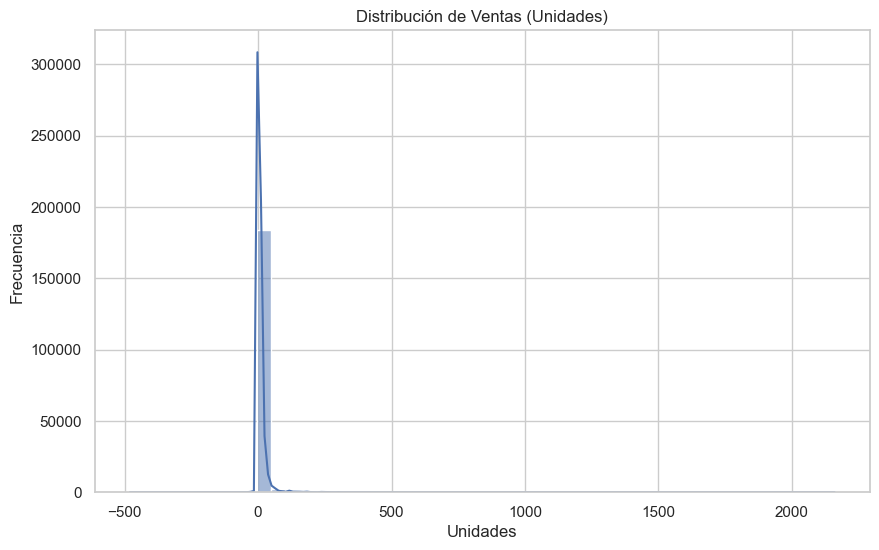

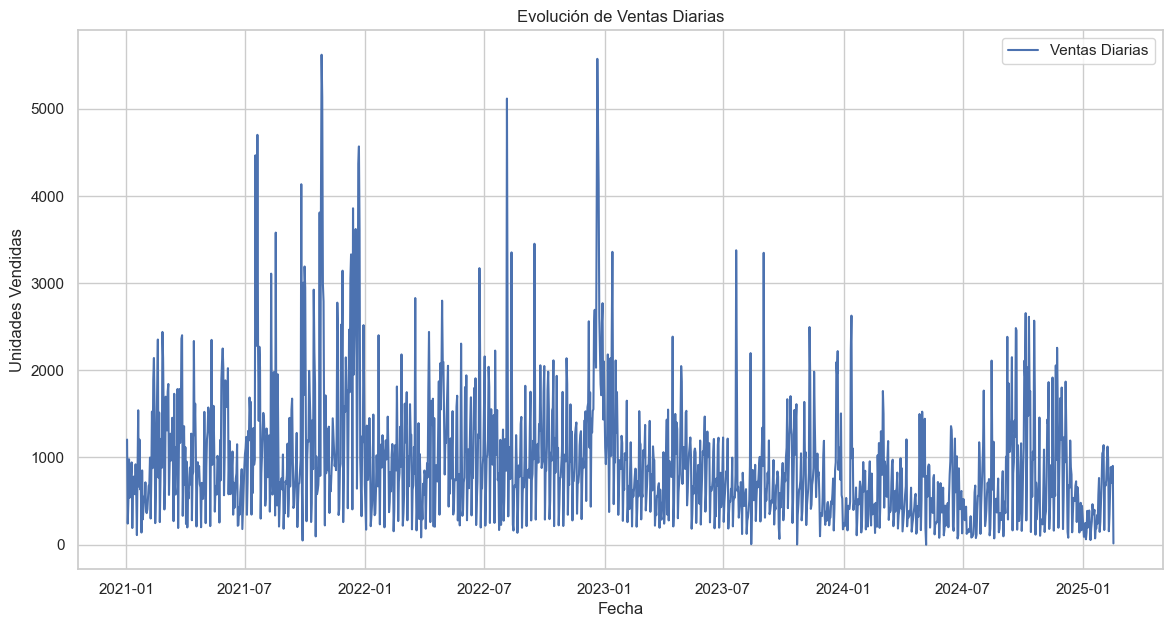

In [30]:
# Comprobaci√≥n de valores nulos
print('Valores nulos por columna:')
print(df.isnull().sum())

# An√°lisis de la distribuci√≥n de ventas (Unidades)
plt.figure(figsize=(10, 6))
sns.histplot(df['Unidades'], bins=50, kde=True)
plt.title('Distribuci√≥n de Ventas (Unidades)')
plt.xlabel('Unidades')
plt.ylabel('Frecuencia')
plt.show()

# Evoluci√≥n de ventas a lo largo del tiempo (agrupado por fecha)
ventas_diarias = df.groupby('Fecha')['Unidades'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(ventas_diarias['Fecha'], ventas_diarias['Unidades'], label='Ventas Diarias')
plt.title('Evoluci√≥n de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.show()

## Preprocesamiento y Transformaci√≥n de los Datos

Se procede a convertir la columna `Fecha` en el √≠ndice del dataframe. Adem√°s, se selecciona un ejemplo representativo (un art√≠culo y una tienda) para realizar la predicci√≥n. Posteriormente, se agrupan las ventas por d√≠a y se generan variables derivadas (lags y medias m√≥viles) para enriquecer la informaci√≥n de entrada."

In [46]:
df_venta_semana_articulo = df.groupby(['A√±o-Semana', 'Codigo_Articulo', 'Sucursal'])['Unidades'].sum().reset_index()

# Mostrar las primeras filas del DataFrame resultante
print(df_venta_semana_articulo.head())


  A√±o-Semana  Codigo_Articulo  Sucursal  Unidades
0    2021-00             4018         1      73.0
1    2021-00             4018         2      17.0
2    2021-00             4018         3      40.0
3    2021-00             4018         4       2.0
4    2021-00             4018         5       1.0


<Figure size 1200x600 with 0 Axes>

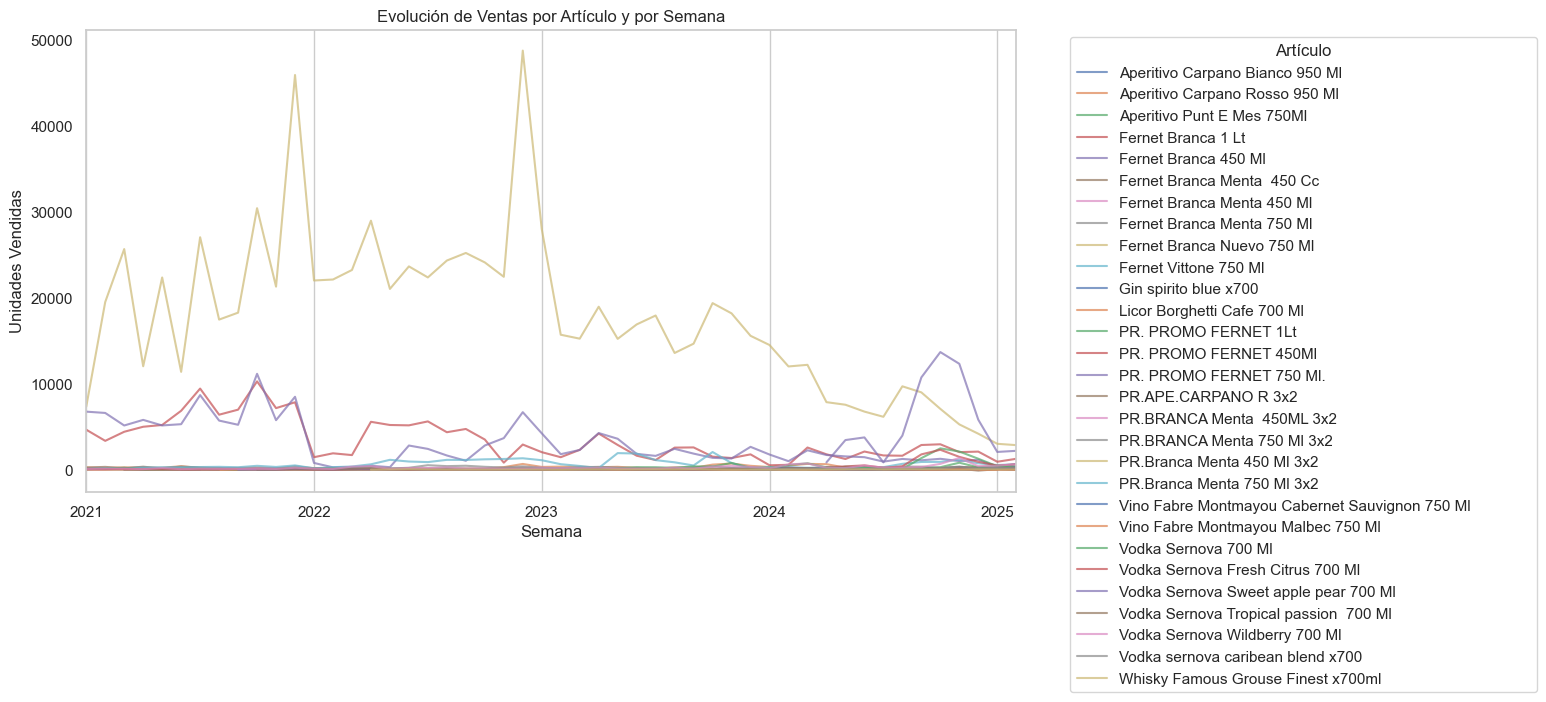

In [ ]:
# 2. Ventas Totales por Art√≠culo y por Mes (usando Nombre_Articulo)
df_venta_semana_articulo = data.groupby(['A√±o-Mes', 'Nombre_Articulo'])['Unidades'].sum().unstack()

plt.figure(figsize=(12, 6))
df_venta_semana_articulo.plot(kind='line', figsize=(12, 6), alpha=0.7)
plt.title('Evoluci√≥n de Ventas por Art√≠culo y por Semana')
plt.xlabel('Semana')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Art√≠culo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [47]:
#import pandas as pd

# Verificar el nombre de las columnas
print("Columnas disponibles en df:", df.columns)

# Asegurar que 'Fecha' existe y est√° en formato datetime
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'])
else:
    raise KeyError("La columna 'Fecha' no existe en df. Verifique el nombre.")

# Seleccionar un ejemplo: se elige un art√≠culo y una tienda espec√≠ficos
codigo_articulo_ej = df['Codigo_Articulo'].unique()[0]
sucursal_ej = df['Sucursal'].unique()[0]

# Filtrar por c√≥digo de art√≠culo y sucursal
df_ej = df[(df['Codigo_Articulo'] == codigo_articulo_ej) & (df['Sucursal'] == sucursal_ej)].copy()

# Verificar si la columna 'Fecha' est√° en df_ej despu√©s de filtrar
if 'Fecha' not in df_ej.columns:
    raise KeyError("La columna 'Fecha' no est√° en df_ej despu√©s de filtrar. Revise la estructura de df.")

# Establecer 'Fecha' como √≠ndice
df_ej.set_index('Fecha', inplace=True)

# Agrupar las ventas por d√≠a
ventas_diarias_ej = df_ej['Unidades'].resample('D').sum().fillna(0)

# Mostrar las primeras filas
print("Demanda de Ejemplo de 1 Art√≠culo al azar:")
# tools.display_dataframe_to_user(name="DataFrame B√°sico", dataframe=ventas_diarias_ej)
ventas_diarias_ej.head()


Columnas disponibles en df: Index(['Fecha', 'Codigo_Articulo', 'Sucursal', 'Precio', 'Costo', 'Unidades',
       'Familia', 'Rubro', 'SubRubro', 'Nombre_Articulo', 'Clasificacion',
       'A√±o-Mes', 'A√±o-Semana', 'id_tienda', 'formato', 'Dia_Semana',
       'Semana_A√±o'],
      dtype='object')
Demanda de Ejemplo de 1 Art√≠culo al azar:


Fecha
2021-01-02    1.0
2021-01-03    0.0
2021-01-04    0.0
2021-01-05    2.0
2021-01-06    0.0
Freq: D, Name: Unidades, dtype: float64

### Creaci√≥n de Variables (Feature Engineering)

Se generan variables de retardo (lag) y medias m√≥viles para incorporar informaci√≥n hist√≥rica en el modelo de Machine Learning.

In [49]:
#df_model = ventas_diarias_ej.to_frame(name='Unidades')

df_model = df_venta_semana_articulo

# Crear variables de lag (por ejemplo, 1, 7 y 14 d√≠as)
for lag in [1, 7, 14]:
    df_model[f'lag_{lag}'] = df_model['Unidades'].shift(lag)

# Crear variable de media m√≥vil de 7 d√≠as
df_model['rolling_mean_7'] = df_model['Unidades'].rolling(window=7).mean()

# Eliminar valores nulos generados por el lag y la media m√≥vil
df_model.dropna(inplace=True)

tools.display_dataframe_to_user(name="DataFrame Modelo Semanal", dataframe=df_model)


DataFrame Modelo Semanal


## Divisi√≥n de Datos en Entrenamiento y Prueba

Se define un corte temporal para separar el conjunto en datos de entrenamiento y de prueba. En este ejemplo, se utiliza el √∫ltimo mes de datos como conjunto de prueba.

In [50]:
train_end = df_model.index.max() - pd.Timedelta(days=30)
train_data = df_model.loc[:train_end]
test_data = df_model.loc[train_end + pd.Timedelta(days=1):]

print('Periodo de Entrenamiento:', train_data.index.min(), 'a', train_data.index.max())
print('Periodo de Prueba:', test_data.index.min(), 'a', test_data.index.max())

TypeError: unsupported operand type(s) for -: 'numpy.int64' and 'Timedelta'

## Modelado

A continuaci√≥n se presentan tres enfoques de modelado:

1. **ARIMA:** Modelo estad√≠stico para series temporales.
2. **Holt-Winters:** Suavizamiento exponencial con componentes para tendencia y estacionalidad.
3. **Random Forest:** Modelo de Machine Learning basado en √°rboles de decisi√≥n, utilizando las variables derivadas.

### 1. Modelo ARIMA

Se ajusta un modelo ARIMA sobre la serie temporal de entrenamiento y se realizan predicciones para el conjunto de prueba.

In [ ]:
# Ajuste de un modelo ARIMA
# Se define el orden del modelo (p, d, q); este par√°metro puede ser optimizado
arima_order = (1, 1, 1)

model_arima = ARIMA(train_data['Unidades'], order=arima_order)
model_arima_fit = model_arima.fit()

# Predicci√≥n sobre el conjunto de prueba
pred_arima = model_arima_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['Unidades'], label='Entrenamiento')
plt.plot(test_data.index, test_data['Unidades'], label='Real')
plt.plot(test_data.index, pred_arima, label='Predicci√≥n ARIMA')
plt.title('Predicci√≥n con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.show()

### 2. Modelo Holt-Winters (Exponential Smoothing)

Se utiliza el m√©todo de Holt-Winters para modelar la serie teniendo en cuenta la tendencia y la estacionalidad (con periodicidad semanal en este ejemplo)

In [ ]:
# Ajuste del modelo Holt-Winters
model_hw = ExponentialSmoothing(train_data['Unidades'], trend='add', seasonal='add', seasonal_periods=7)
model_hw_fit = model_hw.fit()

# Predicci√≥n sobre el conjunto de prueba
pred_hw = model_hw_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['Unidades'], label='Entrenamiento')
plt.plot(test_data.index, test_data['Unidades'], label='Real')
plt.plot(test_data.index, pred_hw, label='Predicci√≥n Holt-Winters')
plt.title('Predicci√≥n con Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.show()

### 3. Modelo de Machine Learning: Random Forest

Se entrena un modelo de Random Forest utilizando las variables de retardo y medias m√≥viles obtenidas en el feature engineering.

In [ ]:
# Preparaci√≥n de datos para el modelo de Machine Learning
features = [col for col in df_model.columns if col != 'Unidades']

X_train = train_data[features]
y_train = train_data['Unidades']

X_test = test_data[features]
y_test = test_data['Unidades']

# Entrenamiento del modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicci√≥n sobre el conjunto de prueba
pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['Unidades'], label='Entrenamiento')
plt.plot(test_data.index, y_test, label='Real')
plt.plot(test_data.index, pred_rf, label='Predicci√≥n Random Forest')
plt.title('Predicci√≥n con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.show()

## Evaluaci√≥n de Resultados

Se calculan las principales m√©tricas de error para cada uno de los modelos: RMSE, MAE y MAPE. Esto permitir√° comparar objetivamente el desempe√±o de los distintos enfoques.

In [ ]:
# Funci√≥n para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluaci√≥n ARIMA
rmse_arima = sqrt(mean_squared_error(test_data['Unidades'], pred_arima))
mae_arima = mean_absolute_error(test_data['Unidades'], pred_arima)
mape_arima = mean_absolute_percentage_error(test_data['Unidades'], pred_arima)

print('ARIMA:')
print(f'RMSE: {rmse_arima:.2f}')
print(f'MAE: {mae_arima:.2f}')
print(f'MAPE: {mape_arima:.2f}%')

# Evaluaci√≥n Holt-Winters
rmse_hw = sqrt(mean_squared_error(test_data['Unidades'], pred_hw))
mae_hw = mean_absolute_error(test_data['Unidades'], pred_hw)
mape_hw = mean_absolute_percentage_error(test_data['Unidades'], pred_hw)

print('\\nHolt-Winters:')
print(f'RMSE: {rmse_hw:.2f}')
print(f'MAE: {mae_hw:.2f}')
print(f'MAPE: {mape_hw:.2f}%')

# Evaluaci√≥n Random Forest
rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
mae_rf = mean_absolute_error(y_test, pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, pred_rf)

print('\\nRandom Forest:')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')

In [ ]:
def smape(y_true, y_pred):
    # Convertir a arrays de NumPy para facilitar las operaciones vectorizadas
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Calcular el denominador de la f√≥rmula: suma de los valores absolutos de y_true y y_pred
    denominator = np.abs(y_true) + np.abs(y_pred)
    # Evitar la divisi√≥n por cero: donde el denominador es cero, se asigna 0 (ya que 0/0 se considera error nulo en este contexto)
    smape_values = np.where(denominator == 0, 0, 2.0 * np.abs(y_true - y_pred) / denominator)
    # Calcular el SMAPE medio y multiplicar por 100 para expresarlo en porcentaje
    return np.mean(smape_values) * 100

# Reemplazar la l√≠nea original de MAPE por la siguiente:
smape_arima = smape(test_data['Unidades'], pred_arima)
smape_hw = smape(test_data['Unidades'], pred_hw)
smape_rf = smape(y_test, pred_rf)


print('\\Metricas SMAPE:')
print(f'Ramdon Forest: {smape_rf:.2f}')
print(f'Holt Winters: {smape_hw:.2f}')
print(f'ARIMA: {smape_arima:.2f}%')

## Conclusiones y Siguientes Pasos

El presente Notebook demuestra un enfoque integral para la evaluaci√≥n de diferentes algoritmos de predicci√≥n de la demanda. Se recomienda continuar con la optimizaci√≥n de hiperpar√°metros, explorar modelos adicionales (incluyendo t√©cnicas de deep learning y m√©todos de ensemble) y, finalmente, integrar el pipeline en el sistema de reposici√≥n autom√°tica para su validaci√≥n en un entorno real.

El grupo de trabajo puede beneficiarse de incluir variables que representen tanto el d√≠a de la semana como la semana del a√±o, ya que ambas permiten capturar diferentes niveles de estacionalidad y patrones c√≠clicos en los datos. En particular:

### D√≠a de la semana:
La incorporaci√≥n de esta variable puede ser especialmente √∫til para capturar efectos a corto plazo. En muchos entornos, especialmente en el sector retail, se observa que la demanda var√≠a significativamente entre d√≠as laborables y fines de semana. Por ejemplo, es com√∫n que se registren picos de ventas en ciertos d√≠as (por ejemplo, durante el fin de semana o en d√≠as con promociones especiales). Esta variable, al ser de naturaleza categ√≥rica, puede incluirse mediante codificaci√≥n dummy o utilizando transformaciones que permitan capturar dichas variaciones.

### Semana del a√±o:
La variable que indica la semana del a√±o ayuda a identificar patrones de largo plazo y tendencias estacionales que se repiten anualmente, tales como las variaciones propias de temporadas de vacaciones, festividades o campa√±as estacionales. Este enfoque resulta relevante cuando la demanda presenta fluctuaciones significativas a lo largo del a√±o, permitiendo al modelo ajustarse a estas variaciones y mejorar la precisi√≥n en periodos espec√≠ficos.

El grupo de trabajo deber√°, a partir de un an√°lisis exploratorio de los datos, determinar cu√°l de estas variables (o la combinaci√≥n de ambas) aporta mayor valor predictivo. Es importante tener en cuenta que la inclusi√≥n simult√°nea de ambas puede aportar informaci√≥n complementaria, pero tambi√©n podr√≠a generar redundancias o problemas de multicolinealidad si las dos variables est√°n altamente correlacionadas. Por ello, se recomienda realizar pruebas emp√≠ricas y an√°lisis de sensibilidad para validar la utilidad de cada variable en el contexto espec√≠fico de la demanda a estimar.

## Opini√≥n GENERAL
La incorporaci√≥n tanto del d√≠a de la semana como de la semana del a√±o suele resultar ventajosa, siempre que se respalde con un an√°lisis previo que confirme la existencia de patrones estacionales a diferentes escalas temporales. Se sugiere lo siguiente:

### Evaluaci√≥n emp√≠rica:
Es recomendable que el grupo de trabajo realice un an√°lisis de descomposici√≥n de la serie temporal para identificar si existen patrones estacionales diarios o anuales. De esta forma, se podr√° determinar si los cambios en la demanda se relacionan de forma consistente con d√≠as espec√≠ficos de la semana o si existen fluctuaciones a nivel semanal que justifiquen la inclusi√≥n de la semana del a√±o.

### Manejo de la multicolinealidad:
En caso de que ambas variables muestren una correlaci√≥n alta, podr√≠a ser prudente aplicar t√©cnicas de reducci√≥n de dimensionalidad o selecci√≥n de variables para evitar redundancias en el modelo, lo que permitir√° que la predicci√≥n sea m√°s robusta y que se maximice la capacidad explicativa del conjunto de variables.

### Flexibilidad del modelo:
La combinaci√≥n de ambas variables puede aportar un mayor grado de precisi√≥n al modelo de predicci√≥n, ya que permite captar tanto las variaciones de corto plazo (d√≠a a d√≠a) como las tendencias de largo plazo (ciclo anual). Esto es especialmente relevante en contextos donde la demanda se ve influenciada por factores operativos diarios y por eventos estacionales o promocionales.

En resumen, ChatGPT opina que, de implementarse correctamente y tras una adecuada validaci√≥n emp√≠rica, la inclusi√≥n de estas variables estacionales puede mejorar significativamente el rendimiento predictivo del modelo, ofreciendo una visi√≥n m√°s completa y adaptada a los patrones inherentes a la demanda.